In [1]:
import numpy as np
data = np.load("../hydrax/logs/controls_rollouts_full.npz", allow_pickle=True)


In [2]:
tq = data["tq"]
us = data["us"]
rollouts = data["rollouts"].tolist()  # list of dicts

In [3]:
# Extract and display all keys
print("Available keys in the data file:")
print("-" * 40)
for key in data.keys():
    value = data[key]
    if hasattr(value, 'shape'):
        print(f"'{key}': shape {value.shape}")
    else:
        print(f"'{key}': {value}")

print(f"\nTotal keys: {len(data.keys())}")

Available keys in the data file:
----------------------------------------
'tq': shape (321,)
'us': shape (321, 1)
'rollouts': shape (321,)

Total keys: 3


In [12]:
for i in range(3):
    print(f"Rollout {i} keys:", data['rollouts'][i].keys())
    print("Controls shape:", data['rollouts'][i]['controls'].shape)
    print()

Rollout 0 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)

Rollout 1 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)

Rollout 2 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)



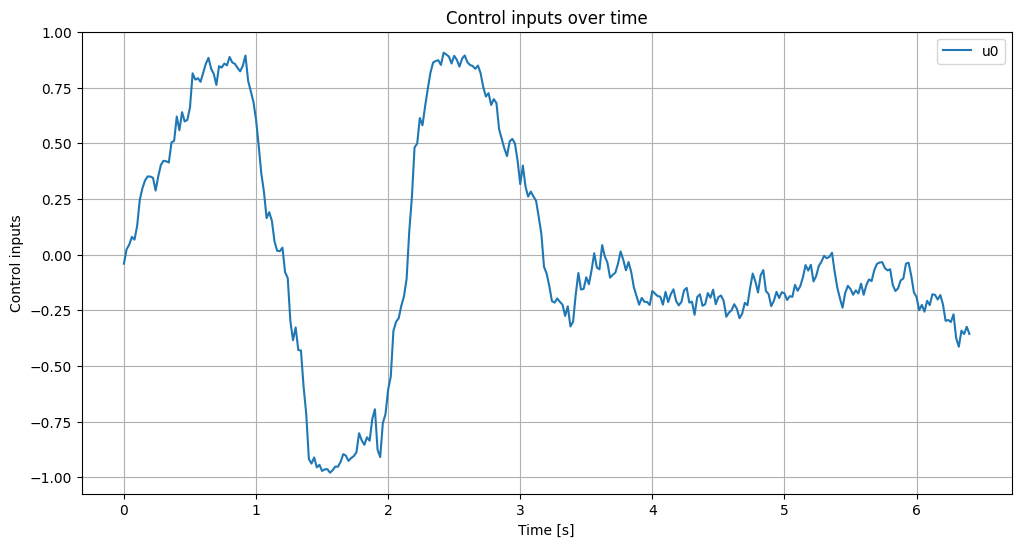

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data (you already did this)
# data = np.load("../hydrax/logs/controls_full.npz")
# tq = data["tq"]
# us = data["us"]

# us shape: (num_timesteps, num_controls)
num_controls = us.shape[1]

plt.figure(figsize=(12, 6))
for i in range(num_controls):
    plt.plot(tq, us[:, i], label=f"u{i}")

plt.xlabel("Time [s]")
plt.ylabel("Control inputs")
plt.title("Control inputs over time")
plt.legend()
plt.grid(True)
plt.show()


rollout.shape (32, 50, 1)


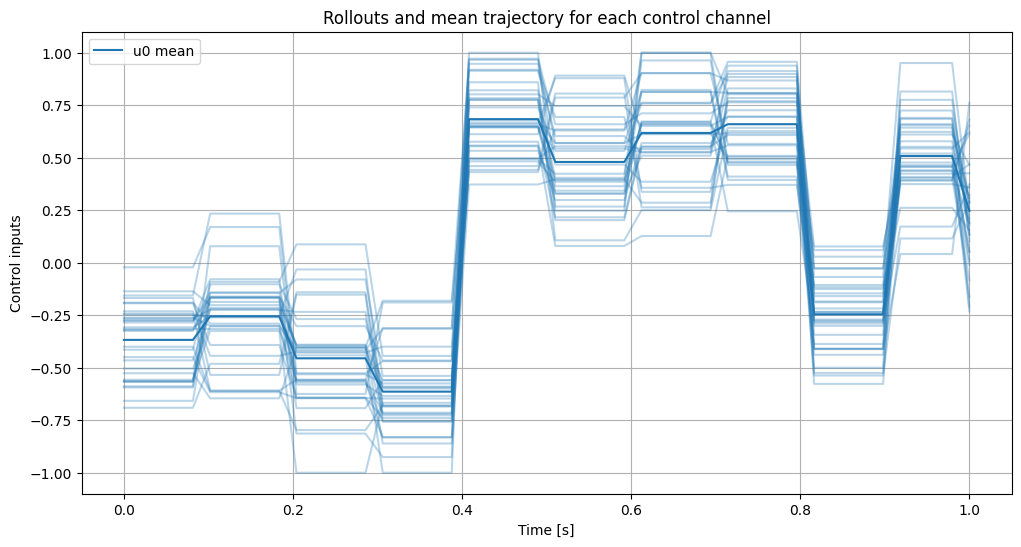

In [5]:
# Choose which replanning step to visualize (e.g., the last one)
rollout_idx = -1  # last replanning
rollout = rollouts[rollout_idx]["controls"]  # shape (num_samples, ctrl_steps, nu)
print("rollout.shape", rollout.shape)

num_samples, ctrl_steps, nu = rollout.shape
time = np.linspace(0, ctrl_steps * (tq[1]-tq[0]), ctrl_steps)  # approximate times for rollout steps

plt.figure(figsize=(12, 6))
for i in range(nu):
    for s in range(num_samples):
        plt.plot(time, rollout[s, :, i], color="C"+str(i), alpha=0.3)
    # Also plot the mean trajectory for this control
    mean_traj = rollout[:, :, i].mean(axis=0)
    plt.plot(time, mean_traj, color="C"+str(i), label=f"u{i} mean")

plt.xlabel("Time [s]")
plt.ylabel("Control inputs")
plt.title("Rollouts and mean trajectory for each control channel")
plt.legend()
plt.grid(True)
plt.show()

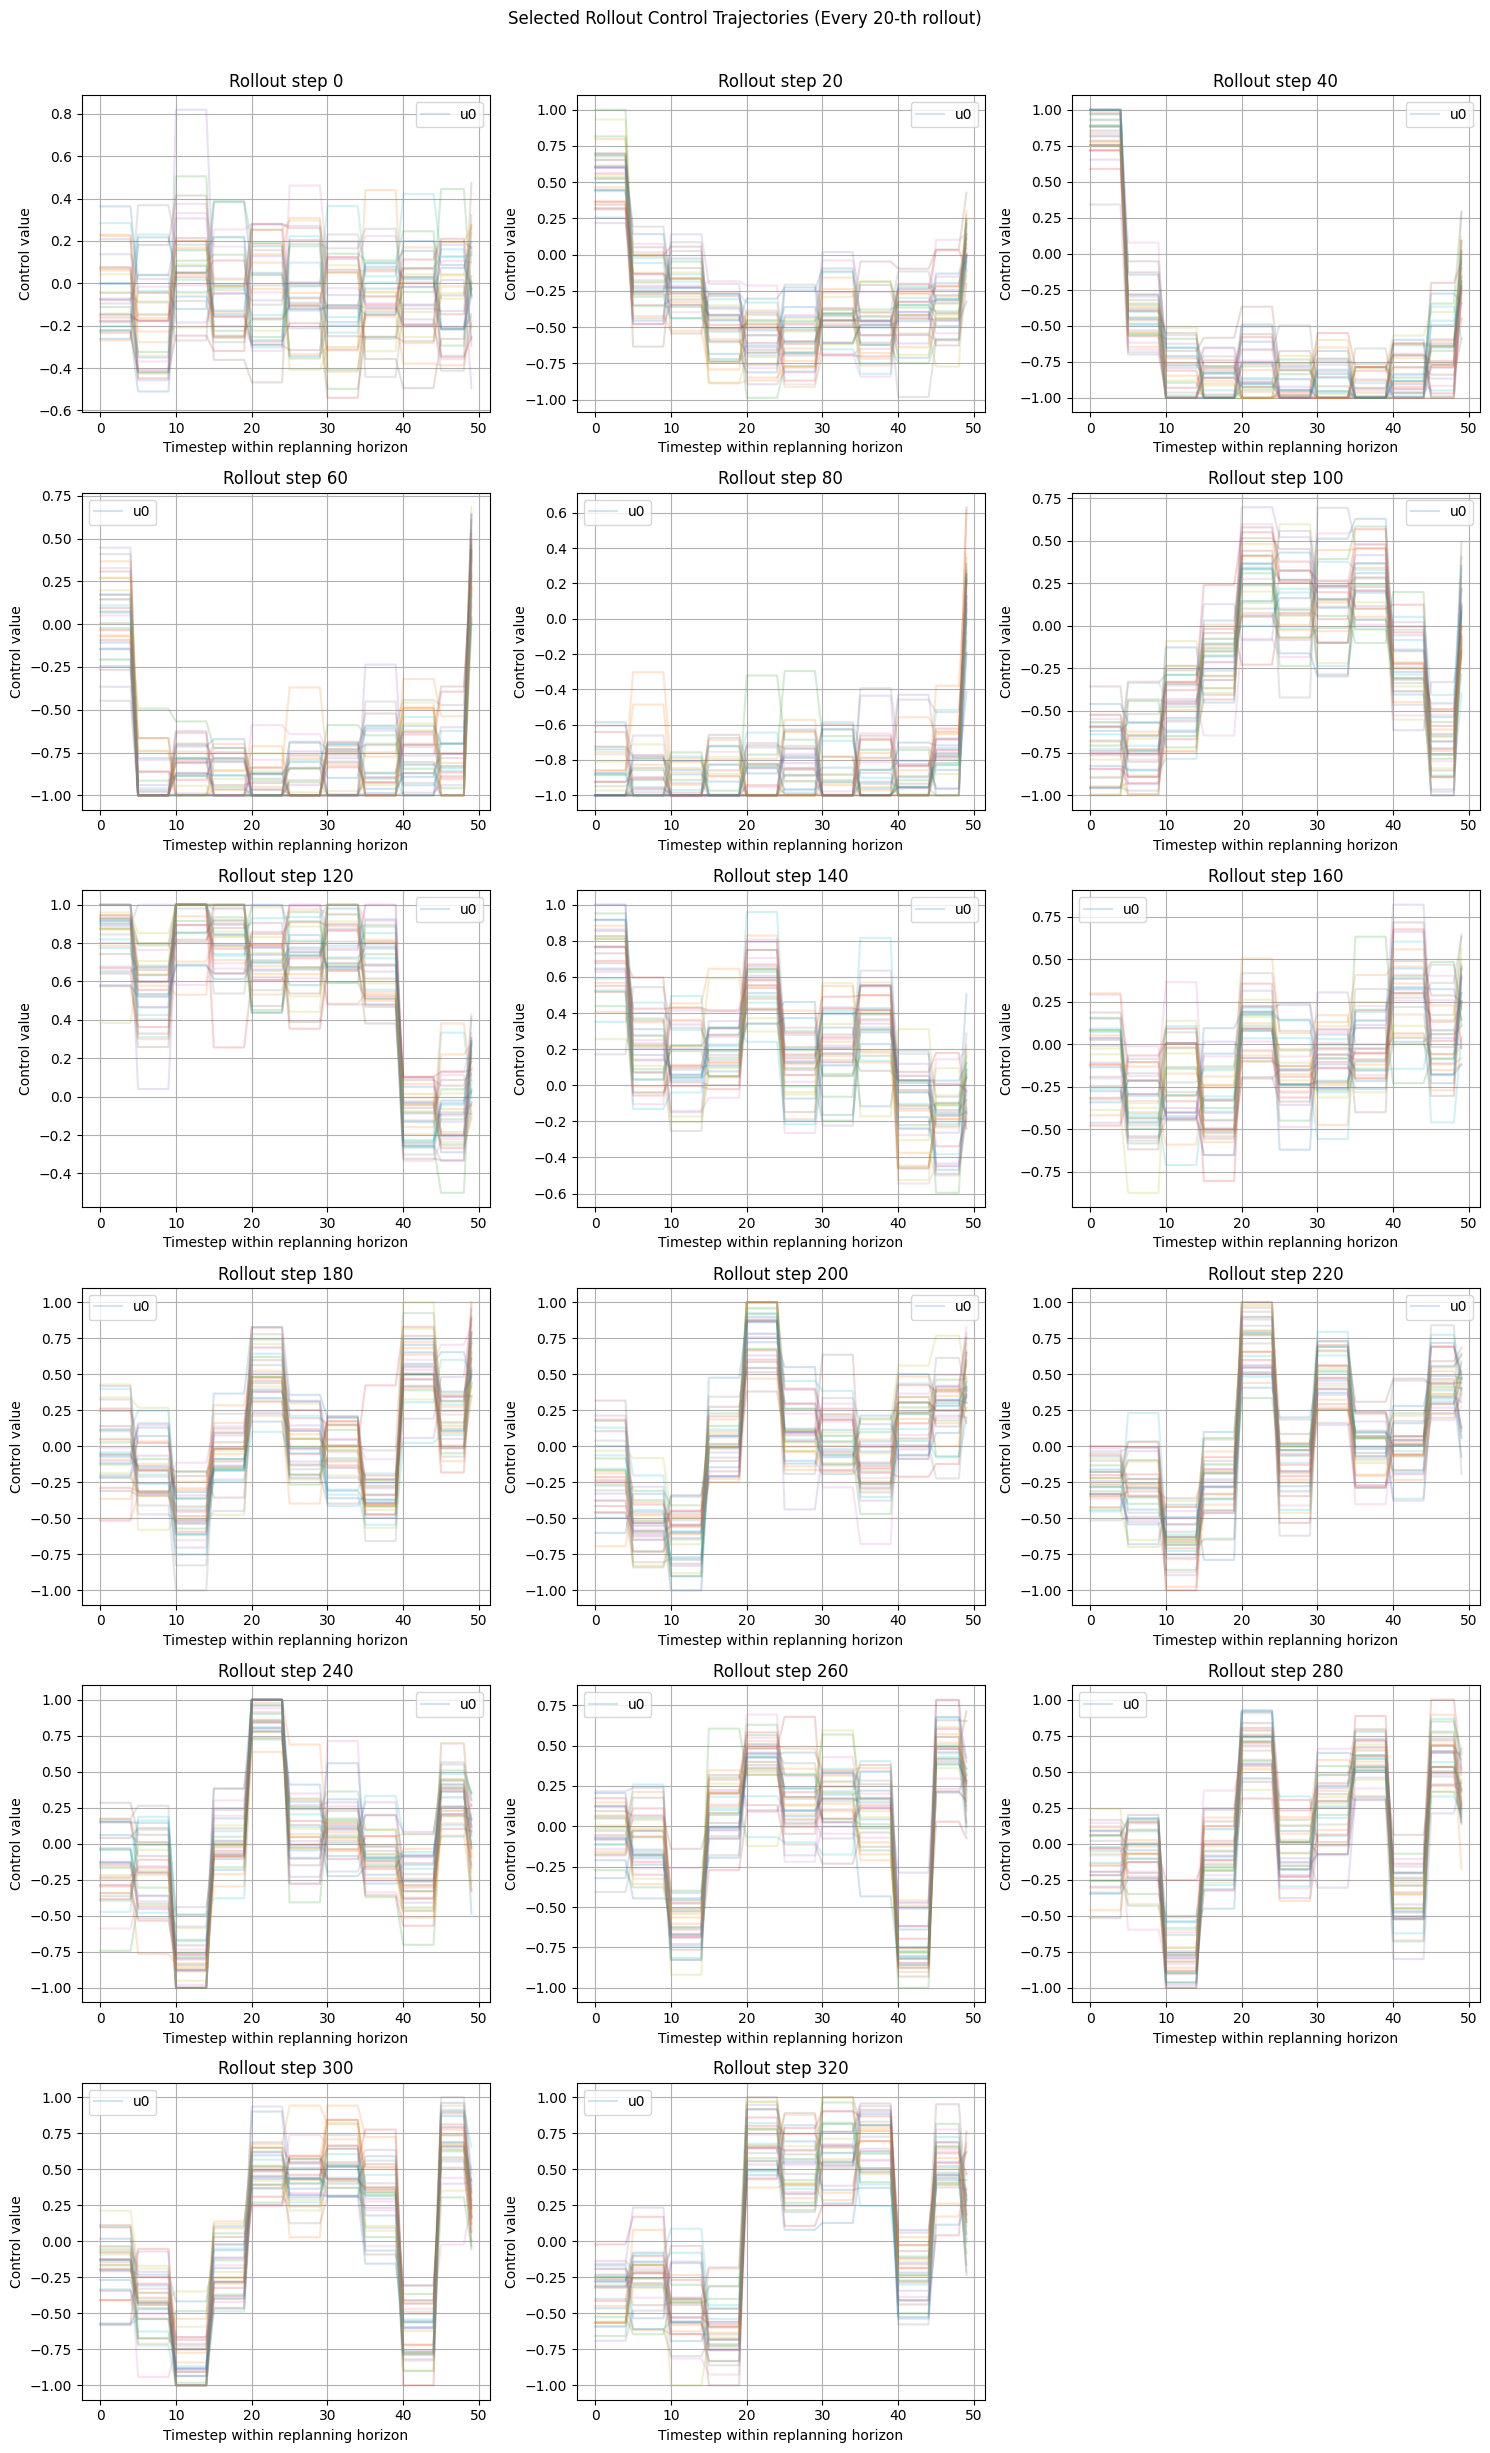

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 20
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)

# Decide number of plots per row
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout = rollouts[rollout_idx]["controls"]  # (num_samples, ctrl_steps, nu)
    num_samples, ctrl_steps, nu = rollout.shape
    time = np.linspace(0, ctrl_steps-1, ctrl_steps)

    # Plot each control dimension as a separate line
    for i in range(nu):
        for s in range(num_samples):
            plt.plot(time, rollout[s, :, i], alpha=0.2, label=f'u{i}' if s == 0 else None)

    plt.xlabel("Timestep within replanning horizon")
    plt.ylabel("Control value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Control Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()
